# 伦敦道路安全的空间正义：交通事故风险与贫困区域、交通设施分布的错位分析

## Preparation

- [Github link](google.com) *[Optional]*

- Number of words: ***

- Runtime: *** hours (*Memory 8 GB, CPU Apple M3, macOS 14.5 (23F79)*)

- Coding environment: SDS Docker

- License: this notebook is made available under the [Creative Commons Attribution license](https://creativecommons.org/licenses/by/4.0/) .

- Additional library *[libraries not included in SDS Docker or not used in this module]*:
    - **watermark**: A Jupyter Notebook extension for printing timestamps, version numbers, and hardware information.
    - ......

## Table of contents

1. [Introduction](#Introduction)

1. [Research questions](#Research-questions)

1. [Data](#Data)

1. [Methodology](#Methodology)

1. [Results and discussion](#Results-and-discussion)

1. [Conclusion](#Conclusion)

1. [References](#References)

## 1  Introduction

[[ go back to the top ]](#Table-of-contents)

Road safety is a complex issue influenced by individual behaviors, built environmental and social conditions. Understanding these interactions is key to reducing casualties.
现有的很多报告研究了个人行为、经济状况等个人因素与交通安全之间的关系，但缺乏社会环境因素对交通安全影响的分析。
tfl的研究（Inequalities in road danger in London(2017-2021)）表明，IMD对伦敦的 casualty location rate有重大影响，发生伤害碰撞的位置极度不均衡。本项目通过标准化每个 IMD 剥夺组中每米道路的伤亡人数，发现，前30%极度贫困的地区casualty location rate是30%最不贫困地区的两倍。与此同时，在所有交通环境因素中，道路安全设施（例如信号灯、摄像头、减速标志等）对伤亡率的影响最大。通过可视化伦敦道路安全设施的分布密度，研究发现，伦敦的道路交通安全设施的空间分布存在不极度均衡现象，一些经常发生碰撞的地区反而交通安全设施密度较低。总而言之，这项研究可以帮助伦敦市政府明确在城市交通发展规划中的资源倾斜，有助于创建一个更平等、更公平的伦敦。

理论层面：揭示社会经济剥夺与交通设施分布的空间耦合机制，补充“环境正义”理论在交通安全领域的证据。

实践层面：为伦敦市政府提供高风险区域清单及优先级排序（如“Top 10 需增设信号灯的热点路段”），推动资源公平分配。

方法论层面：结合空间统计与机器学习，建立多维度风险评估框架，可推广至其他城市。

## 2  Research questions

[[ go back to the top ]](#Table-of-contents)

需着重注意的点：
1.需详细探讨研究使用了哪些方法，并解释这些方法如何为你的研究提供依据。找出该领域的差距将加强研究的背景，更好地证明研究的必要性。
要提出详细的研究问题
2.要添加更多的统计证据，使其更加有力。例如，数据分布情况如何？是否存在异常值？另外，您是如何处理共线性的？图 3 显示失业率和贫困率之间有很强的相关性--这会对你的模型结果产生什么影响？

The inequalities in road danger report focuses on two areas:
- The collision location, where injuries happen, and
- The demographic characteristics of the people who are injured.

在伦敦，是否存在某些社会经济脆弱群体聚集的区域，在缺乏道路安全设施的同时，承担了更高的交通事故严重风险？这种“风险”在地理上是否与“资源”错位分布？
1.贫困地区是否面临更高的交通安全风险？是否有明显的空间聚集性？——casualty location rate 箱线图 + G*空间聚类
2.哪些环境设施因素与严重交通事故分布有关？----osm导出的交通安全设施的位置信息+天气、照明、路面等，利用随机森林做分类
3.事故风险的空间分布是否与基础设施投入形成地理错位？————绘制设施密度图，与第一问做对比

## 3  Data

[[ go back to the top ]](#Table-of-contents)

*[Note: a table that describes the selected variables for analysis and modelling is required - see the example below.]*

In [ ]:
| Variable                            | Type         | Description                                                             |Notes   |
|-------------------------------------|--------------|-------------------------------------------------------------------------|---|
| Burglary crime rate                 | Numeric      | The burglary rate of MSOAs. Used as dependent variables in regression.  |   |
| Temperature                         | Numeric      | The daytime temperature                                                 |   |
| Indicator of Inner or Outer London  | Categorical  | Whether the MSOA is in Inner London.                                    |   |
| ......  | ......  | ......                                    |   |

3年交通安全数据
casualty location rate /Getis-Ord Gi*交通安全设施数据+light condition+路面情况
人口数据
经济数据

IMD 综合了有关收入、就业、教育、技能和培训、健康和残疾、犯罪、住房和服务障碍以及生活环境的数据。该信息产生剥夺分数，该分数对全国所有 LSOA 进行排名。该排名的结果是从 1 到 10 的贫困十分位数，其中 1 代表英格兰最贫困的 10% LSOA，10 代表最贫困的 10% LSOA。

## 4  Methodology

[[ go back to the top ]](#Table-of-contents)

Source: see [link](https://linkinghub.elsevier.com/retrieve/pii/S2210670722004437).

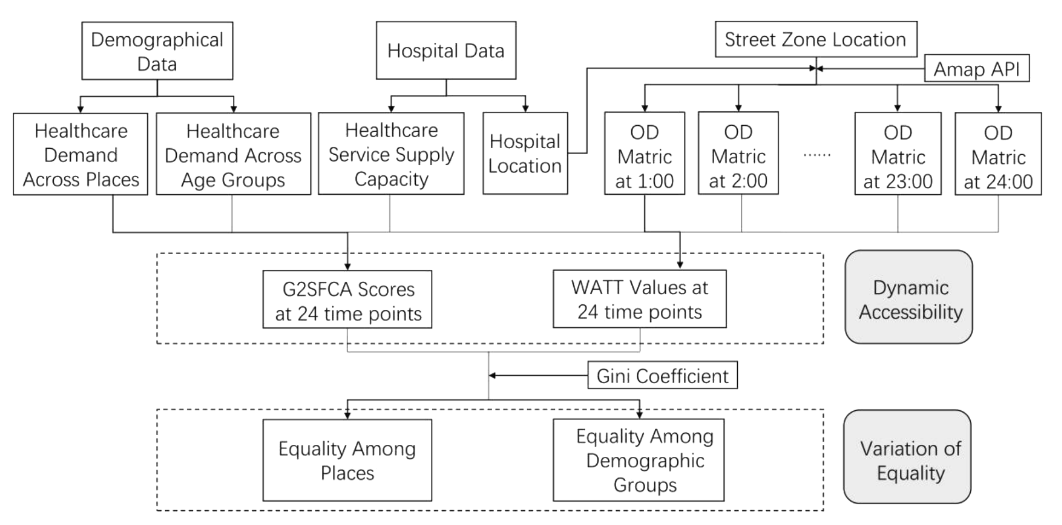

In [52]:
graph TD
A[数据预处理] --> B[计算伤亡地点率 CLR]
B --> C[空间聚类分析 G*]
B --> D[随机森林分类模型]
C --> E[热点区域识别]
D --> F[特征重要性排序]
E --> G[设施密度与热点叠加]
F --> G
G --> H[错位指数计算]
H --> I[政策建议]

SyntaxError: invalid syntax (1145345711.py, line 1)

### 4.1
该研究着眼于各LSOA中每公里出现的伤亡人数，并根据不同LSOA的IMD进行分类，探讨伤亡率在不同贫困等级中是否存在共同特性。因此研究中提到的casualty location rate是伤亡地点率（或死亡或重伤地点率）是通过将每个贫困组中每米道路的伤亡人数标准化为每公里的比率来计算的。
Casualty Location Rate = Casualty Count/ Road Length(m) * 1000 metres of road
IMD在伦敦的LSOA排名已被用作剥夺碰撞位置和碰撞人士的家庭邮政编码的衡量标准。该分析的重点是比较最多30％（IMD十分位1,2,3）的结果，而30％（IMD DICILE 8,9,10）的剥夺位置和人口最小30％，以检查剥夺对道路危险的影响。
在TfL之前的研究中，我们已经知道高Casualty Location Rate明显聚集在贫困地区，因此，本研究想进一步使用Getis-Ord G* 探索这种高伤亡率区域是否聚集在特定的地理区域，以及是否存在显著的高值或低值空间聚集模式。G* 能够量化数据中是否存在 高值（热点）或低值（冷点）的空间聚集，而不仅仅是随机分布。对于伤亡率研究，可以明确回答“高伤亡率区域是否显著聚集在特定地理位置”。

### 4.2 哪些环境设施因素与事故等级有关？预测高风险地区
在预测伤亡情况时，本研究使用了道路数据中的accident severity，severity共有三个等级，fatal/serious/slight。在Tfl之前的研究中，slight类别占交通事故中的绝大多数，但是这类事故处理起来较为简单，所以重点关注fatal 和serious地区，可以合理分配救援资源。量化各变量（如夜间灯光不足、雨天、无交通信号灯）对预测伤亡等级的贡献度，本研究用随机森林分类来实现。随机森林分类是多分类任务的主流算法，并且可以通过feature_importances_，量化各变量的贡献度，除此之外，随机森林还可以用来标记预测高死亡概率的地区。

### 4.3


## 5  Results and discussion

[[ go back to the top ]](#Table-of-contents)

#### 1.贫困地区是否面临更高的交通安全风险？是否有明显的空间聚集性？casualty location rate + G* 

In [ ]:
# pip install osmnx

In [2]:
import geopandas as gpd  
import pandas as pd  
import matplotlib.pyplot as plt  
from matplotlib.colors import LinearSegmentedColormap, Normalize  
from matplotlib.cm import ScalarMappable 
import seaborn as sns 
import requests  
from shapely.geometry import Point  
import numpy as np  
import osmnx as ox
import shap

In [3]:
# 导入london LSOA文件
london_lsoa = gpd.read_file("data/London_LSOA/LSOA_2011_London_gen_MHW.shp", encoding='utf-8')

#london_lsoa.info()

In [4]:
london_lsoa = london_lsoa.rename(columns={"LSOA11CD": "LSOA_ID"})
#london_lsoa.head(2)

In [5]:
# Read road length CSV
road_length_df = pd.read_csv("data/lsoa_road_length.csv")   

road_length_df = road_length_df.rename(columns={"LSOA Code": "LSOA_ID", "Road Length": "Road_Length"}) 
  
# Merge road length data into london_lsoa  
london_lsoa = london_lsoa.merge(
    road_length_df[["LSOA_ID", "Road_Length"]],
    on="LSOA_ID",
    how="left"
)
# 如果有缺失值，填充  
london_lsoa = london_lsoa[london_lsoa["Road_Length"] > 0] 

london_lsoa.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 4659 entries, 0 to 4834
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   LSOA_ID      4659 non-null   object  
 1   LSOA11NM     4659 non-null   object  
 2   MSOA11CD     4659 non-null   object  
 3   MSOA11NM     4659 non-null   object  
 4   LAD11CD      4659 non-null   object  
 5   LAD11NM      4659 non-null   object  
 6   RGN11CD      4659 non-null   object  
 7   RGN11NM      4659 non-null   object  
 8   USUALRES     4659 non-null   int32   
 9   HHOLDRES     4659 non-null   int32   
 10  COMESTRES    4659 non-null   int32   
 11  POPDEN       4659 non-null   float64 
 12  HHOLDS       4659 non-null   int32   
 13  AVHHOLDSZ    4659 non-null   float64 
 14  geometry     4659 non-null   geometry
 15  Road_Length  4659 non-null   float64 
dtypes: float64(3), geometry(1), int32(4), object(8)
memory usage: 546.0+ KB


In [6]:
# 导入英国IMD文件，并筛选出伦敦部分
uk_imd = pd.read_csv("data/UK_IMD.csv")
london_imd = uk_imd[uk_imd["LAD_code"].str.startswith("E09")]

london_imd = london_imd.rename(columns={"LSOA_code": "LSOA_ID"})

#london_imd.info()
#london_imd.head(2)

In [7]:
london_lsoa = london_lsoa.merge(
    london_imd[["LSOA_ID", "IMD_Decile"]],
    on="LSOA_ID",
    how="left"
)
london_lsoa["IMD_Decile"] = london_lsoa["IMD_Decile"].fillna(0) 
london_lsoa.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4659 entries, 0 to 4658
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   LSOA_ID      4659 non-null   object  
 1   LSOA11NM     4659 non-null   object  
 2   MSOA11CD     4659 non-null   object  
 3   MSOA11NM     4659 non-null   object  
 4   LAD11CD      4659 non-null   object  
 5   LAD11NM      4659 non-null   object  
 6   RGN11CD      4659 non-null   object  
 7   RGN11NM      4659 non-null   object  
 8   USUALRES     4659 non-null   int32   
 9   HHOLDRES     4659 non-null   int32   
 10  COMESTRES    4659 non-null   int32   
 11  POPDEN       4659 non-null   float64 
 12  HHOLDS       4659 non-null   int32   
 13  AVHHOLDSZ    4659 non-null   float64 
 14  geometry     4659 non-null   geometry
 15  Road_Length  4659 non-null   float64 
 16  IMD_Decile   4659 non-null   int64   
dtypes: float64(3), geometry(1), int32(4), int64(1), object(8)
memor

In [8]:
# 根据 IMD decile 对 LSOA 进行分组  

london_lsoa["IMD_Decile"] = pd.to_numeric(london_lsoa["IMD_Decile"], errors="coerce")  
  
def imd_group(decile):  
    if pd.isnull(decile):  
        return np.nan
    elif decile in [1, 2, 3]:  
        return "most deprived"  
    elif decile in [4, 5, 6, 7]:  
        return "middle deprived"  
    elif decile in [8, 9, 10]:  
        return "least deprived"  
    else:  
        return np.nan

london_lsoa["imd_group"] = london_lsoa["IMD_Decile"].apply(imd_group) 
order_vals = ["most deprived", "middle deprived", "least deprived"] 

/tmp/ipykernel_759/4048907479.py:15: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  casualty_df = pd.read_csv(file)



2021 年按 IMD 分组的统计结果:
         imd_group  lsoa_count  total_casualty  total_road_length  mean_rate  \
0   least deprived        1029          3024.0       5.122824e+06   0.760629   
1  middle deprived        2109         10595.0       9.185493e+06   1.527060   
2    most deprived        1521          9657.0       5.291006e+06   2.367350   

   median_rate  
0     0.573269  
1     1.212895  
2     2.010921  


/tmp/ipykernel_759/4048907479.py:15: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  casualty_df = pd.read_csv(file)



2022 年按 IMD 分组的统计结果:
         imd_group  lsoa_count  total_casualty  total_road_length  mean_rate  \
0   least deprived        1029          3062.0       5.122824e+06   0.757815   
1  middle deprived        2109         10692.0       9.185493e+06   1.534207   
2    most deprived        1521          9695.0       5.291006e+06   2.323928   

   median_rate  
0     0.592716  
1     1.240171  
2     1.928005  


/tmp/ipykernel_759/4048907479.py:15: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  casualty_df = pd.read_csv(file)



2023 年按 IMD 分组的统计结果:
         imd_group  lsoa_count  total_casualty  total_road_length  mean_rate  \
0   least deprived        1029          2878.0       5.122824e+06   0.723181   
1  middle deprived        2109         10179.0       9.185493e+06   1.442241   
2    most deprived        1521          9510.0       5.291006e+06   2.288559   

   median_rate  
0     0.534855  
1     1.159153  
2     1.926327  


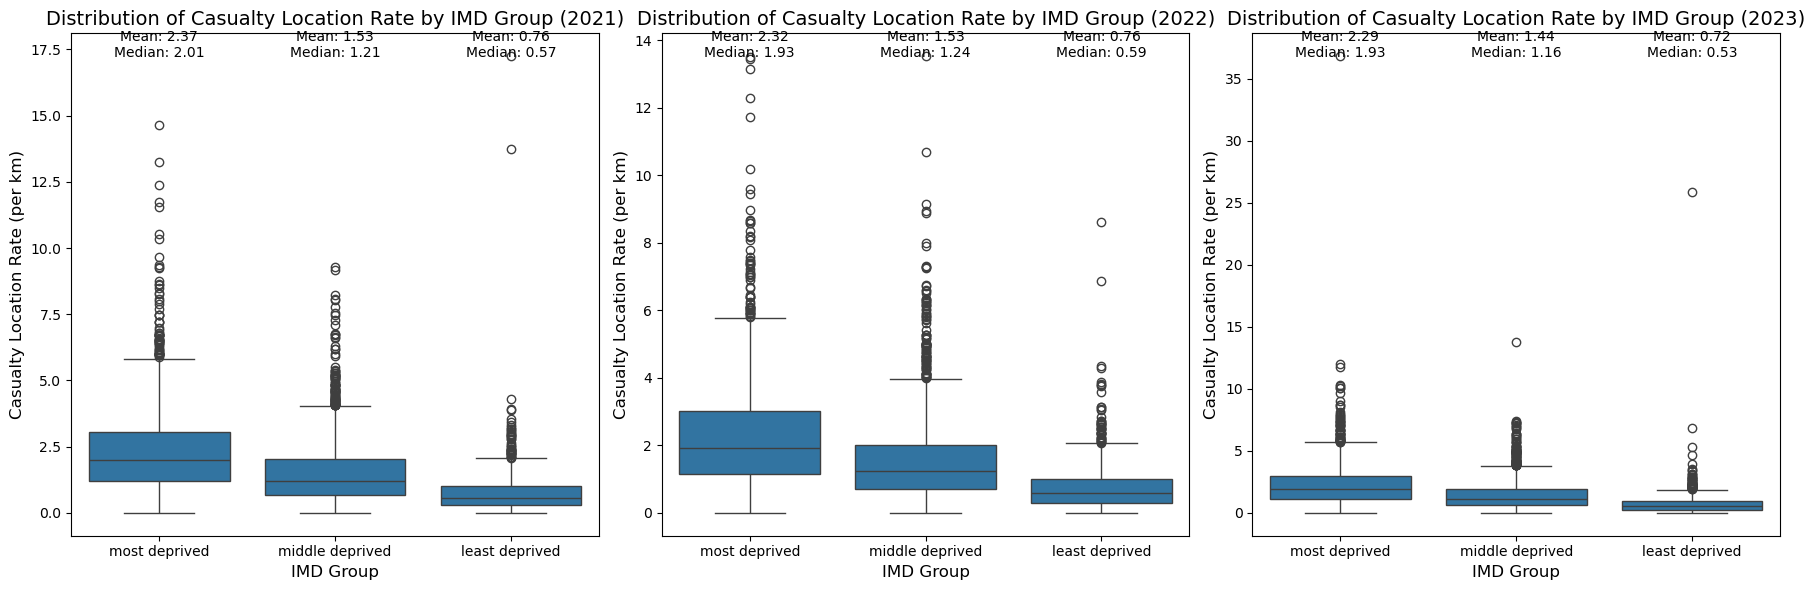

In [9]:
# 按 LSOA 分组统计各年度 casualty 数
casualty_files = {  
    "2021": "data/road_safety/dft-road-casualty-statistics-casualty-2021.csv",  
    "2022": "data/road_safety/dft-road-casualty-statistics-casualty-2022.csv",  
    "2023": "data/road_safety/dft-road-casualty-statistics-casualty-2023.csv"  
} 

# 创建子图，1行3列
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

all_year_stats = [] 

# 按年度循环
for i, (year, file) in enumerate(casualty_files.items()):
    casualty_df = pd.read_csv(file)

    # 统计每个LSOA的casualty数
    casualty_counts = casualty_df.groupby("lsoa_of_casualty").size().reset_index(name=f"casualty_{year}")
    
    london_lsoa = london_lsoa.merge(casualty_counts.rename(columns={"lsoa_of_casualty":"LSOA_ID"}),  
                                    on="LSOA_ID", how="left")   
    london_lsoa[f"casualty_{year}"] = london_lsoa[f"casualty_{year}"].fillna(0)
    
    # 计算 casualty location rate
    rate_col = f"casualty_location_rate_{year}"  
    london_lsoa[rate_col] = london_lsoa[f"casualty_{year}"] / london_lsoa["Road_Length"] * 1000
    
    # 按IMD分组统计，计算各项指标
    stats_df = london_lsoa.groupby("imd_group").agg({  
        "LSOA_ID": "count",  
        f"casualty_{year}": "sum",  
        "Road_Length": "sum",  
        rate_col: ["mean", "median"]  
    })  
    stats_df.columns = ["lsoa_count", "total_casualty", "total_road_length", "mean_rate", "median_rate"]  
    stats_df = stats_df.reset_index()
    
    # 打印统计结果以验证
    print(f"\n{year} 年按 IMD 分组的统计结果:")
    print(stats_df)
    
    # 绘制箱线图
    sns.boxplot(x="imd_group", y=rate_col, data=london_lsoa, order=order_vals, ax=axes[i])
    axes[i].set_xlabel("IMD Group", fontsize=12)
    axes[i].set_ylabel("Casualty Location Rate (per km)", fontsize=12)
    axes[i].set_title(f"Distribution of Casualty Location Rate by IMD Group ({year})", fontsize=14)

    # 添加均值和中位数注释
    ymax = axes[i].get_ylim()[1]  # 获取当前子图的Y轴上限
    stats_dict = stats_df.set_index("imd_group").to_dict(orient="index")
    for j, group in enumerate(order_vals):  
        if group in stats_dict:  
            axes[i].text(j, ymax * 0.95,  
                         f"Mean: {stats_dict[group]['mean_rate']:.2f}\nMedian: {stats_dict[group]['median_rate']:.2f}",  
                         horizontalalignment='center', fontsize=10, color="black")  

plt.tight_layout()
plt.show()

最贫困（most deprived）：这些区域通常显示较高的事故发生率（上部的箱线图显示的较大值）。

中等贫困（middle deprived）：相比最贫困的区域，事故发生率较低。

最不贫困（least deprived）：这些区域的事故发生率通常是最低的。
每个图中都有明显的离群点（以圆点显示），这些点代表极端的交通事故发生率。这些离群点通常出现在最贫困的区域，可能是由于特定区域的交通状况、基础设施问题或其他因素导致的高事故率。
最贫困组的箱子更高，离群点也更多，说明这些区域的事故率分布更分散，有更严重的个别高风险区域。

最不贫困组的箱子很矮，说明事故率集中，波动小，而且上限较低，表示交通安全状况更稳定。

In [10]:
# 导入G*会用到的包
from libpysal.weights import KNN  
from esda.getisord import G_Local  
import contextily as ctx


Start processing G* analyses (based on KNN weights) for the year 2021


/opt/conda/lib/python3.11/site-packages/esda/getisord.py:421: UserWarning: Gi* requested, but (a) weights are already row-standardized, (b) no weights are on the diagonal, and (c) no default value supplied to star. Assuming that the self-weight is equivalent to the maximum weight in the row. To use a different default (like, .5), set `star=.5`, or use libpysal.weights.fill_diagonal() to set the diagonal values of your weights matrix and use `star=None` in Gi_Local.
  w, star = _infer_star_and_structure_w(w, star, transform)



2021 year Statistics of G* Z-score and P-value for different IMD groups:
                 G_zscore                                G_pvalue         \
                     mean    median       min       max      mean median   
imd_group                                                                  
least deprived  -0.500302 -0.597650 -1.055280  3.004968  0.107451  0.054   
middle deprived  0.000453 -0.123470 -1.001109  3.706734  0.185237  0.149   
most deprived    0.433283  0.359581 -0.941872  3.112431  0.175988  0.133   

                               
                   min    max  
imd_group                      
least deprived   0.001  0.498  
middle deprived  0.001  0.500  
most deprived    0.001  0.500  

Start processing G* analyses (based on KNN weights) for the year 2022


/opt/conda/lib/python3.11/site-packages/esda/getisord.py:421: UserWarning: Gi* requested, but (a) weights are already row-standardized, (b) no weights are on the diagonal, and (c) no default value supplied to star. Assuming that the self-weight is equivalent to the maximum weight in the row. To use a different default (like, .5), set `star=.5`, or use libpysal.weights.fill_diagonal() to set the diagonal values of your weights matrix and use `star=None` in Gi_Local.
  w, star = _infer_star_and_structure_w(w, star, transform)



2022 year Statistics of G* Z-score and P-value for different IMD groups:
                 G_zscore                                G_pvalue         \
                     mean    median       min       max      mean median   
imd_group                                                                  
least deprived  -0.501651 -0.584123 -1.024649  1.507612  0.124241  0.064   
middle deprived  0.000788 -0.130383 -0.986534  3.245684  0.197000  0.170   
most deprived    0.433744  0.310638 -0.963554  3.417362  0.188243  0.154   

                               
                   min    max  
imd_group                      
least deprived   0.001  0.500  
middle deprived  0.001  0.500  
most deprived    0.001  0.499  

Start processing G* analyses (based on KNN weights) for the year 2023


/opt/conda/lib/python3.11/site-packages/esda/getisord.py:421: UserWarning: Gi* requested, but (a) weights are already row-standardized, (b) no weights are on the diagonal, and (c) no default value supplied to star. Assuming that the self-weight is equivalent to the maximum weight in the row. To use a different default (like, .5), set `star=.5`, or use libpysal.weights.fill_diagonal() to set the diagonal values of your weights matrix and use `star=None` in Gi_Local.
  w, star = _infer_star_and_structure_w(w, star, transform)



2023 year Statistics of G* Z-score and P-value for different IMD groups:
                 G_zscore                                G_pvalue         \
                     mean    median       min       max      mean median   
imd_group                                                                  
least deprived  -0.478572 -0.556804 -0.923219  3.228848  0.119829  0.060   
middle deprived -0.001620 -0.105592 -0.941447  3.908291  0.199096  0.174   
most deprived    0.426983  0.309613 -0.889811  4.011703  0.183579  0.147   

                             
                   min  max  
imd_group                    
least deprived   0.001  0.5  
middle deprived  0.001  0.5  
most deprived    0.001  0.5  


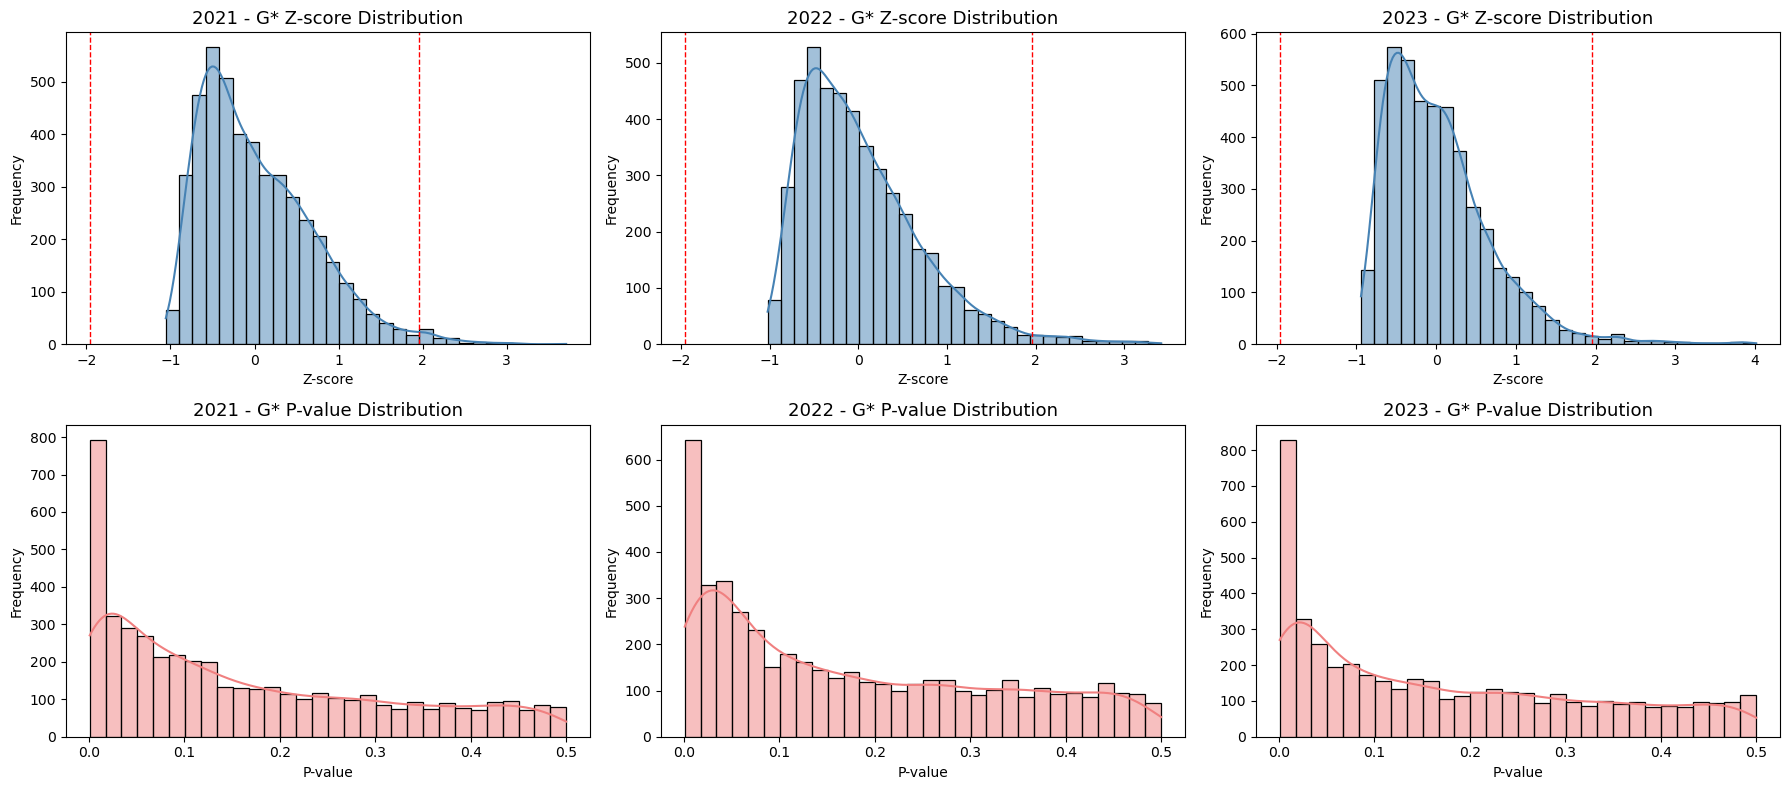

In [11]:
london_lsoa = london_lsoa.to_crs("EPSG:27700") 
years = ["2021", "2022", "2023"]

fig, axes = plt.subplots(2, 3, figsize=(18, 8))  # 2行3列，每列一个年份

for i, year in enumerate(years):
    print(f"\nStart processing G* analyses (based on KNN weights) for the year {year}")
    
    rate_col = f"casualty_location_rate_{year}"
    valid_gdf = london_lsoa.dropna(subset=[rate_col]).copy()

    w = KNN.from_dataframe(valid_gdf, k=5)
    w.transform = 'r'
    
    g_star = G_Local(valid_gdf[rate_col].values, w, star=True)
    valid_gdf["G_zscore"] = g_star.Zs
    valid_gdf["G_pvalue"] = g_star.p_sim
    
    # 统计每个IMD组的显著性均值
    imd_group_stats = valid_gdf.groupby("imd_group")[["G_zscore", "G_pvalue"]].agg(["mean", "median", "min", "max"])
    print(f"\n{year} year Statistics of G* Z-score and P-value for different IMD groups:")
    print(imd_group_stats)

    # Z-score 分布图
    sns.histplot(valid_gdf["G_zscore"], bins=30, kde=True, ax=axes[0, i], color="steelblue")
    axes[0, i].axvline(1.96, color='red', linestyle='--', linewidth=1)
    axes[0, i].axvline(-1.96, color='red', linestyle='--', linewidth=1)
    axes[0, i].set_title(f"{year} - G* Z-score Distribution", fontsize=13)
    axes[0, i].set_xlabel("Z-score")
    axes[0, i].set_ylabel("Frequency")

    # P-value 分布图
    sns.histplot(valid_gdf["G_pvalue"], bins=30, kde=True, ax=axes[1, i], color="lightcoral")
    axes[1, i].set_title(f"{year} - G* P-value Distribution", fontsize=13)
    axes[1, i].set_xlabel("P-value")
    axes[1, i].set_ylabel("Frequency")

    def classify_zscore(z):
        if z < -1.96:
            return "Low-Low"
        elif z < -0.5:
            return "Low"
        elif z <= 0.5:
            return "Not Significant"
        elif z <= 1.96:
            return "High"
        else:
            return "High-High"
    
    valid_gdf["hotspot_category"] = valid_gdf["G_zscore"].apply(classify_zscore)

plt.tight_layout()
plt.show()

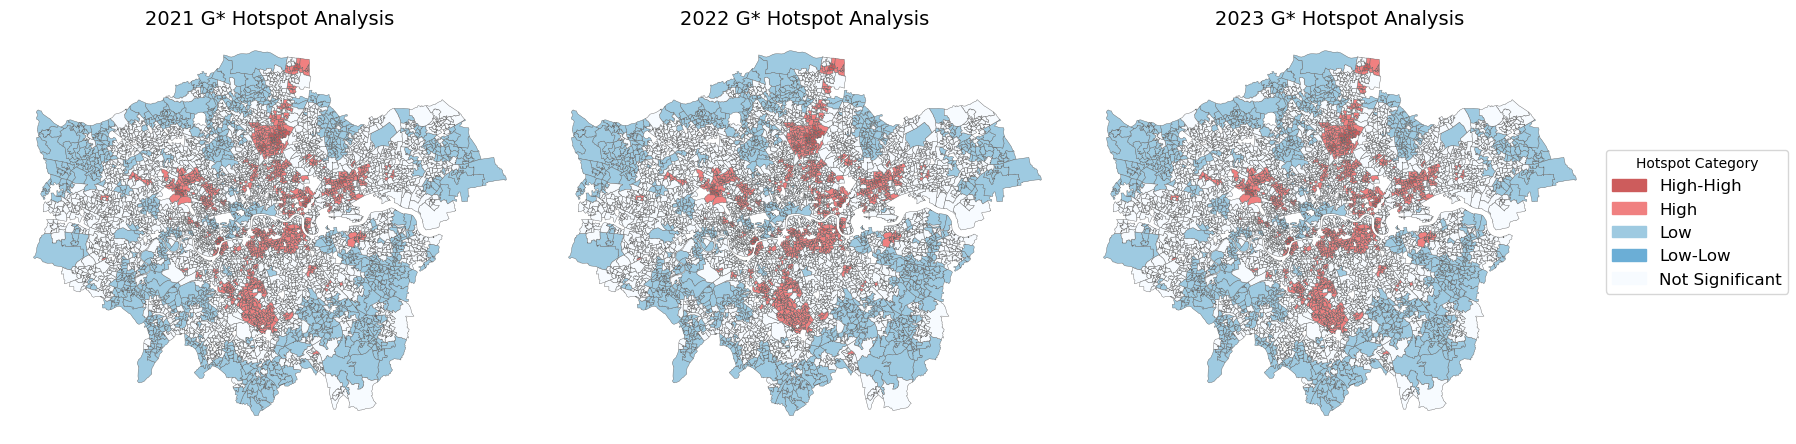

In [12]:
import matplotlib.patches as mpatches

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# colour mapping
color_mapping = {
    "High-High": "#cd5c5c",       
    "High": "#f08080",            
    "Low": "#9ecae1",             
    "Low-Low": "#6baed6",        
    "Not Significant": "#f7fbff"  
}

# 构建图例
handles = [mpatches.Patch(color=color_mapping[label], label=label) for label in color_mapping]

for i, year in enumerate(years):
    ax = axes[i]
    
    for label, color in color_mapping.items():
        subset = valid_gdf[valid_gdf["hotspot_category"] == label]
        if not subset.empty:
            subset.plot(ax=ax,
                        color=color,
                        edgecolor="0.4",
                        linewidth=0.3,
                        alpha=1)

    ax.set_title(f"{year} G* Hotspot Analysis", fontsize=14)
    ax.axis("off")

fig.legend(handles=handles, title="Hotspot Category", loc="center right", frameon=True, fontsize=12)
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

#### 2.哪些环境设施因素与事故等级有关？预测高风险地区

In [13]:
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV  
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  
from sklearn.preprocessing import OneHotEncoder, StandardScaler  
from sklearn.compose import ColumnTransformer  
from sklearn.pipeline import Pipeline 

In [14]:
# 获取交通设施数据
london_lsoa = london_lsoa.to_crs("EPSG:27700")  
  
# Get London's boundary for Overpass query bounds  
london_boundary = london_lsoa.unary_union  
london_gdf = gpd.GeoDataFrame(geometry=[london_boundary], crs="EPSG:27700")  
london_bounds_wgs84 = london_gdf.to_crs("EPSG:4326").total_bounds  # [minx, miny, maxx, maxy]  

/tmp/ipykernel_759/1682601659.py:5: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  london_boundary = london_lsoa.unary_union


In [15]:
# Get London boundary for Overpass query
london_boundary = london_lsoa.unary_union  
london_gdf = gpd.GeoDataFrame(geometry=[london_boundary], crs="EPSG:27700")  
london_bounds_wgs84 = london_gdf.to_crs("EPSG:4326").total_bounds  
  
# Overpass API function to get facilities
def get_facilities_from_overpass(facility_type, bounds):  
    overpass_url = "https://overpass-api.de/api/interpreter"  
    if facility_type == 'traffic_signals':  
        query_filter = 'highway=traffic_signals'  
    elif facility_type == 'surveillance':  
        query_filter = 'man_made=surveillance'  
    elif facility_type == 'traffic_sign':  
        query_filter = 'highway=traffic_sign'  
    else:  
        raise ValueError(f"Unsupported facility type: {facility_type}")  

    query = f"""  
    [out:json];  
    (  
      node[{query_filter}]({bounds[1]},{bounds[0]},{bounds[3]},{bounds[2]});  
    );  
    out body;  
    """  
      
    response = requests.get(overpass_url, params={'data': query})  
    data = response.json()  
    features = []  
    for element in data.get('elements', []):  
        if element['type'] == 'node':  
            pt = Point(element['lon'], element['lat'])  
            features.append({'geometry': pt, 'facility_type': facility_type, 'osm_id': element['id']})  
    if features:  
        return gpd.GeoDataFrame(features, crs="EPSG:4326")  
    else:  
        return gpd.GeoDataFrame(columns=['geometry', 'facility_type', 'osm_id'], crs="EPSG:4326") 


/tmp/ipykernel_759/3042578912.py:2: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  london_boundary = london_lsoa.unary_union


In [16]:
# Get facility data for each facility type and combine into one GeoDataFrame  
facility_types = ['traffic_signals', 'surveillance', 'traffic_sign']  
all_facilities = []  
  
print("Fetching facility data from Overpass API")  
for facility_type in facility_types:  
    print(f"Getting {facility_type}...")  
    facilities = get_facilities_from_overpass(facility_type, london_bounds_wgs84)  
    if not facilities.empty:  
        all_facilities.append(facilities)  
  
if all_facilities:  
    facilities_gdf = pd.concat(all_facilities)  
    facilities_gdf = facilities_gdf.to_crs("EPSG:27700")  
    print(f"Total facilities fetched: {len(facilities_gdf)}")  
else:  
    print("No facilities found")  
    exit()  

Fetching facility data from Overpass API
Getting traffic_signals...
Getting surveillance...
Getting traffic_sign...
Total facilities fetched: 17590


In [17]:
# Spatial join to assign facilities to LSOAs  
facilities_in_lsoa = gpd.sjoin(facilities_gdf, london_lsoa[["LSOA_ID", "geometry"]],   
                               how="inner", predicate="within")  

# Count facilities by LSOA and facility type  
facility_counts = facilities_in_lsoa.groupby(["LSOA_ID", "facility_type"]).size().unstack(fill_value=0)  

# If any facility type is missing, add it with zeros  
for facility_type in facility_types:  
    if facility_type not in facility_counts.columns:  
        facility_counts[facility_type] = 0  
  
# Add total column  
facility_counts['total_facilities'] = facility_counts.sum(axis=1)
  
# Merge counts back to LSOA  
lsoa_with_facilities = london_lsoa.merge(facility_counts, left_on="LSOA_ID", right_index=True, how="left")  
lsoa_with_facilities["total_facilities"] = lsoa_with_facilities["total_facilities"].fillna(0) 

# Calculate facilities per km of road  
lsoa_with_facilities["total_per_km"] = lsoa_with_facilities.apply(  
    lambda row: (row["total_facilities"] / row["Road_Length"])*1000 if row["Road_Length"] > 0 else 0, axis=1) 
  
lsoa_with_facilities = lsoa_with_facilities.fillna(0)  

# Export to CSV  
csv_path = "data/london_lsoa_traffic_facilities_stats.csv"  
cols_to_export = ["LSOA_ID", "traffic_signals", "surveillance", "traffic_sign", "total_facilities", "Road_Length", "total_per_km"]  
lsoa_with_facilities[cols_to_export].to_csv(csv_path, index=False) 

In [18]:
# Save to shapefile  
output_shp = "data/london_lsoa_traffic_facilities_road_density.shp"  
lsoa_with_facilities.to_file(output_shp)  
print(f"Saved shapefile to {output_shp}")

/tmp/ipykernel_759/420212784.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  lsoa_with_facilities.to_file(output_shp)
/opt/conda/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Road_Length' to 'Road_Lengt'
  ogr_write(
/opt/conda/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'casualty_2021' to 'casualty_2'
  ogr_write(
/opt/conda/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'casualty_location_rate_2021' to 'casualty_l'
  ogr_write(
/opt/conda/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'casualty_2022' to 'casualty_1'
  ogr_write(
/opt/conda/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'casualty_location_rate_2022' to 'casualty_3'
  ogr_write(
/opt/conda/lib/python3.11/

Saved shapefile to data/london_lsoa_traffic_facilities_road_density.shp


In [19]:
'''合并三年碰撞数据
files = ['data/road_safety/dft-road-casualty-statistics-collision-2021.csv',
         'data/road_safety/dft-road-casualty-statistics-collision-2022.csv',
         'data/road_safety/dft-road-casualty-statistics-collision-2023.csv']
output_file = 'data/road_safety/merged_collision.csv'
os.makedirs(os.path.dirname(output_file), exist_ok=True)
# define functions to read and merge block by block
def merge_large_csv(files, output_file, chunksize=10000):
    is_first_chunk = True

    for file in files:
        for chunk in pd.read_csv(file, chunksize=chunksize):
            chunk.to_csv(output_file, mode='a', index=False, header=is_first_chunk)
            is_first_chunk = False
    print(f"All files have been merged into {output_file}")
'''

'合并三年碰撞数据\nfiles = [\'data/road_safety/dft-road-casualty-statistics-collision-2021.csv\',\n         \'data/road_safety/dft-road-casualty-statistics-collision-2022.csv\',\n         \'data/road_safety/dft-road-casualty-statistics-collision-2023.csv\']\noutput_file = \'data/road_safety/merged_collision.csv\'\nos.makedirs(os.path.dirname(output_file), exist_ok=True)\n# define functions to read and merge block by block\ndef merge_large_csv(files, output_file, chunksize=10000):\n    is_first_chunk = True\n\n    for file in files:\n        for chunk in pd.read_csv(file, chunksize=chunksize):\n            chunk.to_csv(output_file, mode=\'a\', index=False, header=is_first_chunk)\n            is_first_chunk = False\n    print(f"All files have been merged into {output_file}")\n'

In [20]:
# 读取2021-2023collision数据 
merged_collision = pd.read_csv("data/road_safety/merged_collision.csv")  
lsoa_with_facilities = pd.read_csv("data/london_lsoa_traffic_facilities_stats.csv")  
  
merged_collision = merged_collision.dropna(subset=['lsoa_of_accident_location'])
#merged_collision.info()

/tmp/ipykernel_759/1180726523.py:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,12,14,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_collision = pd.read_csv("data/road_safety/merged_collision.csv")


In [21]:
merged_collision = merged_collision.rename(columns={"lsoa_of_accident_location": "LSOA_ID"})

merged_collision = merged_collision.fillna(0)

In [22]:
# 环境变量（示例）：道路类型、路灯状况、路面状况  
env_features = ['road_type', 'light_conditions', 'weather_conditions', 'road_surface_conditions']


merged_collision = merged_collision.dropna(subset=env_features) 

In [23]:
merged_df = pd.merge(merged_collision, lsoa_with_facilities, on='LSOA_ID', how='inner')  

merged_df = merged_df.fillna(0)
print(f"Total sample size after merger: {merged_df.shape[0]}")  

Total sample size after merger: 127794


In [24]:
merged_df[env_features] = merged_df[env_features].astype(int)

facility_vars = ['traffic_signals', 'surveillance', 'traffic_sign', 'total_facilities', 'total_per_km'] 

# 合并后的数据中环境变量和设施变量均作为特征  
feature_cols = env_features + facility_vars  
target_col = 'accident_severity' 
  
print("\n目标变量分布：")  
print(merged_df[target_col].value_counts())  


目标变量分布：
accident_severity
3    95099
2    17273
3    12717
2     2189
1      470
1       46
Name: count, dtype: int64


In [25]:
print(merged_df[env_features].dtypes)

road_type                  int64
light_conditions           int64
weather_conditions         int64
road_surface_conditions    int64
dtype: object


In [26]:
# 5. 数据分割  
X = merged_df[feature_cols]  
y = merged_df[target_col]  
y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)  
  
# 6. 特征工程：对环境变量进行OneHot编码，对设施变量进行标准化  
preprocessor = ColumnTransformer(  
    transformers=[  
        ('cat', OneHotEncoder(handle_unknown='ignore'), env_features),  # 环境变量  
        ('num', StandardScaler(), facility_vars)  # 设施变量  
    ])  
  
# 7. 建立随机森林多分类管道  
rf_pipeline = Pipeline([  
    ('preprocessor', preprocessor),  
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  
]) 

In [27]:
# 8. 训练模型  
print("\n训练随机森林多分类器...")  
rf_pipeline.fit(X_train, y_train) 


训练随机森林多分类器...


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['road_type',
                                                   'light_conditions',
                                                   'weather_conditions',
                                                   'road_surface_conditions']),
                                                 ('num', StandardScaler(),
                                                  ['traffic_signals',
                                                   'surveillance',
                                                   'traffic_sign',
                                                   'total_facilities',
                                                   'total_per_km'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [28]:
# 9. 模型评估  
print("\n模型评估...")  
y_pred = rf_pipeline.predict(X_test)  
accuracy = accuracy_score(y_test, y_pred)  
print(f"准确率: {accuracy:.4f}")  
print("\n分类报告:")  
print(classification_report(y_test, y_pred))  


模型评估...
准确率: 0.8523

分类报告:
              precision    recall  f1-score   support

           1       0.49      0.18      0.26       155
           2       0.57      0.23      0.33      5839
           3       0.87      0.97      0.92     32345

    accuracy                           0.85     38339
   macro avg       0.64      0.46      0.50     38339
weighted avg       0.82      0.85      0.83     38339



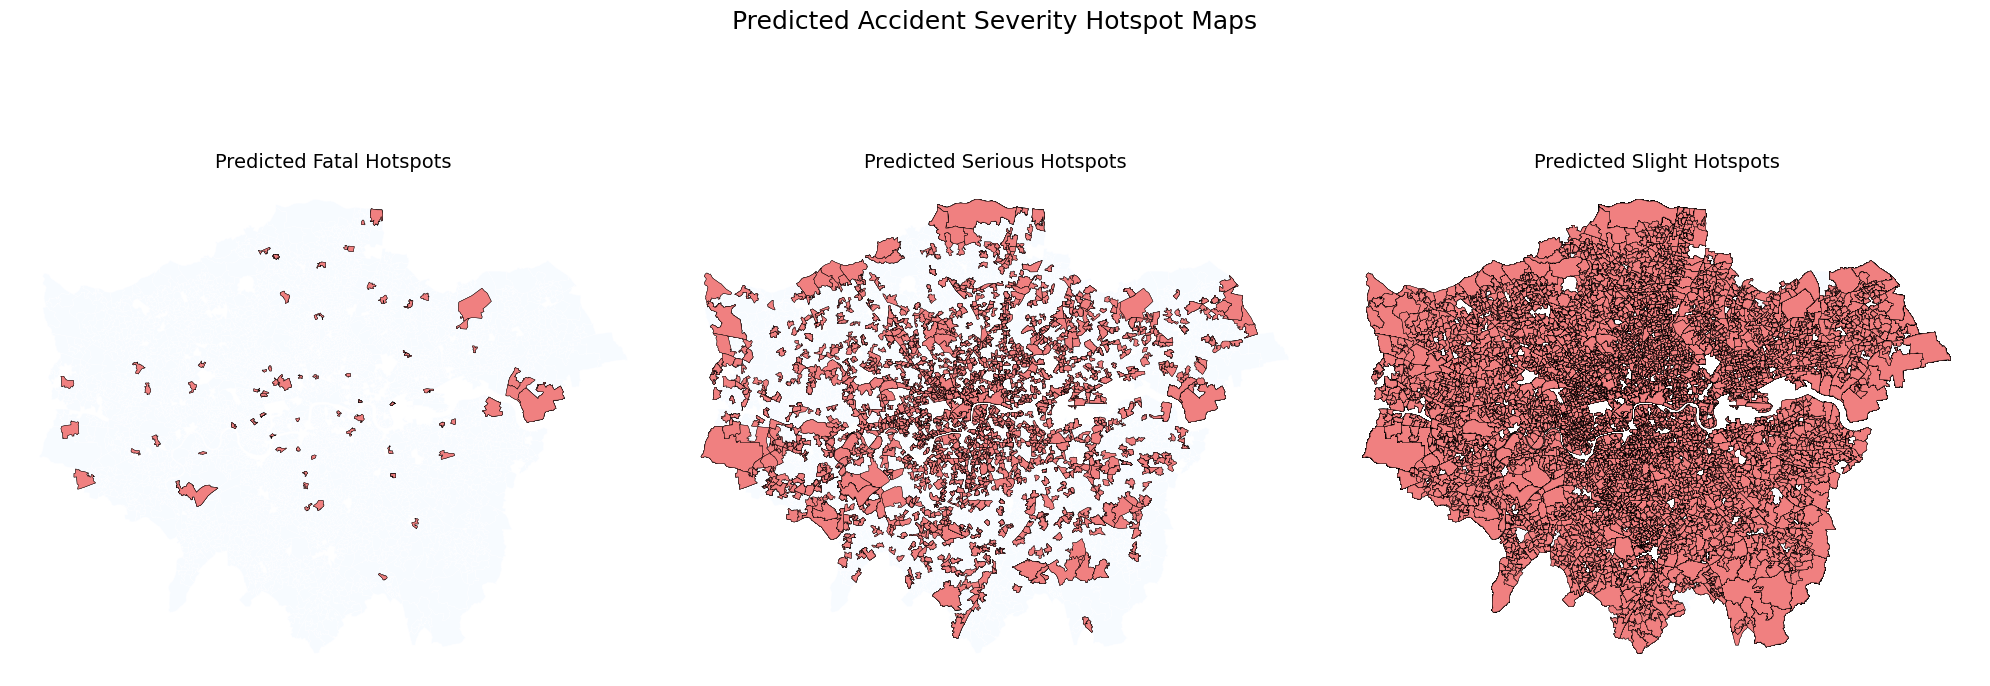

In [29]:
# 获取预测结果
y_pred_all = rf_pipeline.predict(X)  
merged_df['predicted_severity'] = y_pred_all
merged_df['severity_label'] = merged_df['predicted_severity'].map({1: 'Fatal', 2: 'Serious', 3: 'Slight'})
plot_df = london_lsoa.merge(merged_df[['LSOA_ID', 'severity_label']], on='LSOA_ID', how='left')

bg_color = "#f7fbff" 
fg_color = "lightcoral" 

fig, axes = plt.subplots(1, 3, figsize=(20, 8))
severity_list = ['Fatal', 'Serious', 'Slight']
titles = ['Predicted Fatal Hotspots', 'Predicted Serious Hotspots', 'Predicted Slight Hotspots']

for i, severity in enumerate(severity_list):
    ax = axes[i]

    london_lsoa.plot(ax=ax, color=bg_color, edgecolor='white', linewidth=0.3)

    plot_df[plot_df['severity_label'] == severity].plot(
        ax=ax,
        color=fg_color,
        edgecolor='black',
        linewidth=0.3
    )

    ax.set_title(titles[i], fontsize=14)
    ax.axis("off")

plt.suptitle("Predicted Accident Severity Hotspot Maps", fontsize=18)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

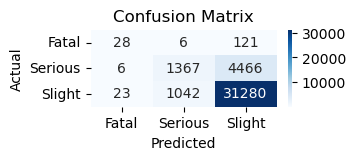

In [30]:
severity_mapping = {1: 'Fatal', 2: 'Serious', 3: 'Slight'}
y_test_mapped = [severity_mapping[label] for label in y_test]
y_pred_mapped = [severity_mapping[label] for label in y_pred]

# 计算混淆矩阵
cm = confusion_matrix(y_test_mapped, y_pred_mapped, labels=['Fatal', 'Serious', 'Slight'])

plt.figure(figsize=(3, 1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fatal', 'Serious', 'Slight'], yticklabels=['Fatal', 'Serious', 'Slight'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

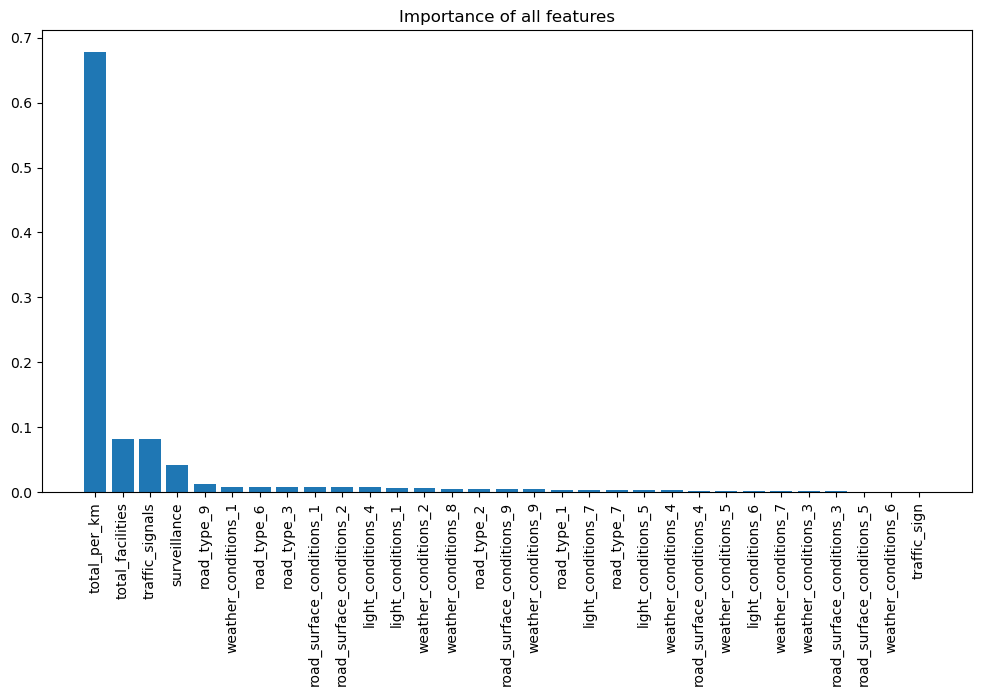

In [31]:
# 特征重要性分析 
feature_names_num = preprocessor.named_transformers_['num'].get_feature_names_out(facility_vars).tolist()  
feature_names_cat = preprocessor.named_transformers_['cat'].get_feature_names_out(env_features).tolist()  
all_feature_names = feature_names_cat + feature_names_num  
  
importances = rf_pipeline.named_steps['classifier'].feature_importances_  
indices = np.argsort(importances)[::-1]  
  
plt.figure(figsize=(12, 6))  
plt.title('Importance of all features')  
plt.bar(range(len(importances)), importances[indices], align='center')  
plt.xticks(range(len(importances)), [all_feature_names[i] for i in indices], rotation=90)   
plt.show()

我们首先使用随机森林模型评估环境因素对事故严重程度预测的重要性，并据此识别了若干关键特征。然而，考虑到特征重要性并不直接等价于统计意义上的相关性，我们进一步使用了多项逻辑回归与 SHAP 分析，以更准确揭示变量与事故等级之间的关系及其方向性。”

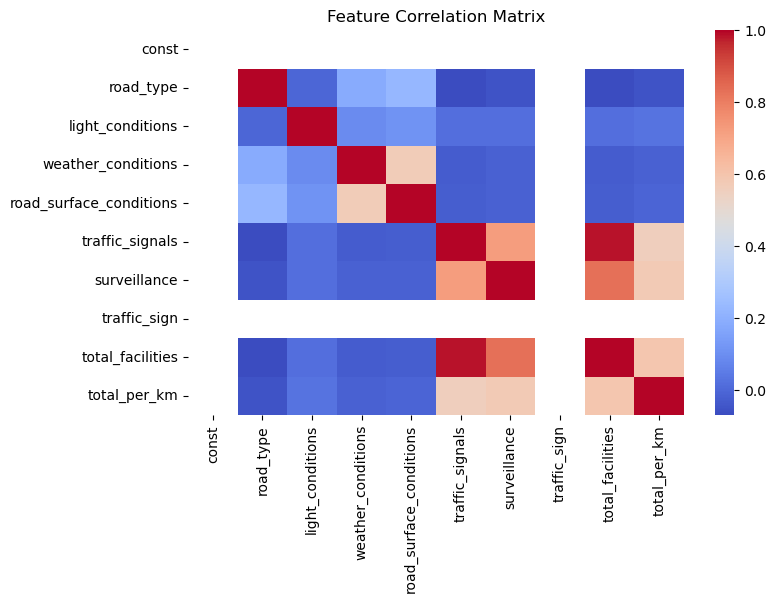

In [48]:
# 可视化变量之间的相关系数
plt.figure(figsize=(8, 5))
sns.heatmap(X.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Matrix")
plt.show()


Optimization terminated successfully.
         Current function value: 0.448547
         Iterations 10
                          MNLogit Regression Results                          
Dep. Variable:      accident_severity   No. Observations:               127794
Model:                        MNLogit   Df Residuals:                   127782
Method:                           MLE   Df Model:                           10
Date:                Tue, 15 Apr 2025   Pseudo R-squ.:                0.008256
Time:                        14:14:53   Log-Likelihood:                -57322.
converged:                       True   LL-Null:                       -57799.
Covariance Type:            nonrobust   LLR p-value:                1.222e-198
    accident_severity=2       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       3.2037      0.143     22.383      0.000       2.923  

/tmp/ipykernel_759/3639817960.py:75: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Severity vs Fatal")


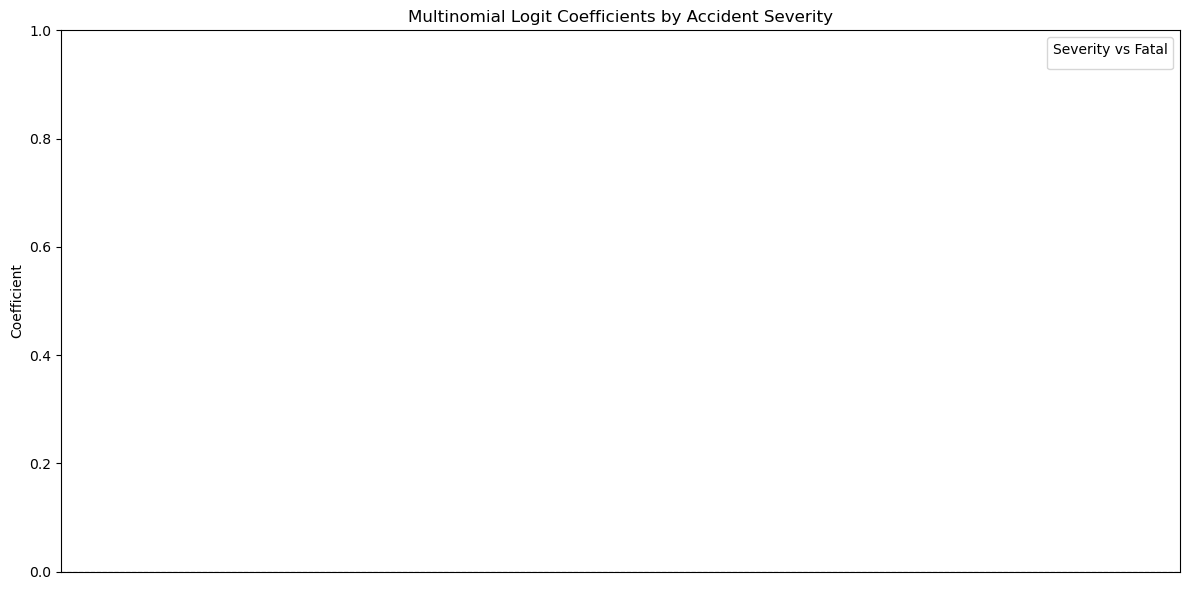

In [50]:
import statsmodels.api as sm

env_vars = ['road_type', 'light_conditions', 'weather_conditions', 'road_surface_conditions']
num_vars = ['total_per_km'] 

target_var = 'accident_severity'

X_cat = pd.get_dummies(merged_df[env_vars], drop_first=True)
X_num = merged_df[num_vars]

# 合并特征 + 添加常数项
X_all = pd.concat([X_cat, X_num], axis=1)
X_all = sm.add_constant(X_all)

y = merged_df[target_var].astype(int)

model = sm.MNLogit(y, X_all)
result = model.fit()

print(result.summary())

#### 3.事故风险的空间分布是否与基础设施投入形成地理错位？

In [ ]:
  
  
# Create a better colormap with higher contrast  
# Using a high-contrast colormap from light to dark  
colors = ["#f7fbff", "#deebf7", "#c6dbef", "#9ecae1", "#6baed6", "#4292c6", "#2171b5", "#08519c", "#08306b"]  
cmap = LinearSegmentedColormap.from_list("high_contrast_blues", colors)  
  
# Visualization with improved color contrast  
fig, ax = plt.figure(figsize=(12, 10)), plt.gca()  
  
# Use quantiles for better color distribution  
vmax = lsoa_with_facilities['total_per_km'].quantile(0.95)  # Cap at 95th percentile to avoid outlier dominance  
norm = Normalize(vmin=0, vmax=vmax)  
  
# Plot with improved colormap  
lsoa_with_facilities.plot(column='total_per_km',  
                          cmap=cmap,  
                          norm=norm,  
                          linewidth=0.3,  
                          ax=ax,  
                          edgecolor="0.5",  
                          legend=False)  

# Add colorbar with clear intervals  
sm = ScalarMappable(norm=norm, cmap=cmap)  
sm.set_array([])  
  
# Create more meaningful tick intervals based on data distribution  
quantiles = [0, 0.25, 0.5, 0.75, 0.9, 0.95, 1.0]  
tick_values = [lsoa_with_facilities['total_per_km'].quantile(q) for q in quantiles]  
tick_values = [round(v, 1) for v in tick_values]  
  
cbar = plt.colorbar(sm, ax=ax, orientation="vertical", pad=0.02, ticks=tick_values)  
cbar.set_label("Traffic Facilities Road Density (per km)", fontsize=12)  
  
# Add title and improve formatting  
plt.title("Traffic Facilities Density in London LSOAs", fontsize=14)  
ax.set_axis_off()  # Remove axes for cleaner map  
  
# Add a text annotation with statistics  
stats_text = (  
    f"Total LSOAs: {len(lsoa_with_facilities)}\n"  
    f"Total Facilities: {int(lsoa_with_facilities['total_facilities'].sum())}\n"  
    f"Max Density: {lsoa_with_facilities['total_per_km'].max():.1f} per km"  
)  
plt.annotate(stats_text, xy=(0.02, 0.02), xycoords='axes fraction',   
             bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="gray", alpha=0.8),  
             fontsize=10)  


plt.tight_layout()  
plt.show()  

## Conclusion

[[ go back to the top ]](#Table-of-contents)

## References

[[ go back to the top ]](#Table-of-contents)